In [1]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd

In [2]:
category=['political','social','market','entertainment','sports','view','blog','International']

news_df={'Category':[],'Link':[],'News':[]}
n=int(input('enter of page ='))
for i in range(1,n+1):
    for cat in category:
        url=BeautifulSoup(f'https://en.setopati.com/{cat}?page={i}','html.parser')
        data=requests.get(url)
        news_code=BeautifulSoup(data.text,"lxml")
        for link in news_code.find_all('a'):
            if f"{cat}/" in link.get('href'):
                news_df['Link'].append(link.get('href'))
                news_df['Category'].append(cat)

enter of page =3


C:\Users\Dell\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [3]:
for i in news_df['Link']:
        url=BeautifulSoup(i,'html.parser')
        data=requests.get(url)
        content=BeautifulSoup(data.text,"lxml")
        try:
            content=content.find('div','editor-box')
            news_df['News'].append(content.text)
        except AttributeError:
            print("Error: 'NoneType' object has no attribute 'find'")
            news_df['News'].append('NAN')


Error: 'NoneType' object has no attribute 'find'
Error: 'NoneType' object has no attribute 'find'
Error: 'NoneType' object has no attribute 'find'


In [4]:
df=pd.DataFrame(news_df)
df

,Category,Link,News
0,political,https://en.setopati.com/political/160842,\nJanata Samajwadi Party (JSP) Chairman Upendr...
1,political,https://en.setopati.com/political/160842,\nJanata Samajwadi Party (JSP) Chairman Upendr...
2,political,https://en.setopati.com/political/160851,\nThe Cabinet has revoked the decision to hand...
3,political,https://en.setopati.com/political/160850,\nThe Baburam Bhattarai-led Nepal Samajwadi Pa...
4,political,https://en.setopati.com/political/160847,\nHearing on the writ petition filed against t...
...,...,...,...
433,International,https://en.setopati.com/International/160668,\nThe decision whether to indict former Presid...
434,International,https://en.setopati.com/International/160667,\nJapanese Prime Minister Fumio Kishida made a...
435,International,https://en.setopati.com/International/160666,\nWhen China suddenly scrapped onerous zero-CO...
436,International,https://en.setopati.com/International/160661,\nJapanese Prime Minister Fumio Kishida began ...


In [5]:
df[df['News']!='NAN'].to_csv('09-classfication/New_news_dataset.csv')

In [6]:
data=pd.read_csv('09-classfication/New_news_dataset.csv')
data

,Unnamed: 0,Category,Link,News
0,0,political,https://en.setopati.com/political/160842,\nJanata Samajwadi Party (JSP) Chairman Upendr...
1,1,political,https://en.setopati.com/political/160842,\nJanata Samajwadi Party (JSP) Chairman Upendr...
2,2,political,https://en.setopati.com/political/160851,\nThe Cabinet has revoked the decision to hand...
3,3,political,https://en.setopati.com/political/160850,\nThe Baburam Bhattarai-led Nepal Samajwadi Pa...
4,4,political,https://en.setopati.com/political/160847,\nHearing on the writ petition filed against t...
...,...,...,...,...
430,433,International,https://en.setopati.com/International/160668,\nThe decision whether to indict former Presid...
431,434,International,https://en.setopati.com/International/160667,\nJapanese Prime Minister Fumio Kishida made a...
432,435,International,https://en.setopati.com/International/160666,\nWhen China suddenly scrapped onerous zero-CO...
433,436,International,https://en.setopati.com/International/160661,\nJapanese Prime Minister Fumio Kishida began ...


In [7]:
data['News'][0]

'\nJanata Samajwadi Party (JSP) Chairman Upendra Yadav, who lost to Janamat Party Chairman CK Raut in the House of Representatives (HoR) constituency of Saptari-2 in November 2022, may again have to suffer at the hands of Raut.\nThis by-election in Bara-2 will\xa0be a battle between the waning pre-eminent force in Madhes, JSP,\xa0and the rising force, Janamat Party, that hopes to one day overtake JSP\xa0as the strongest party in the plains.\nRaut recognizing that his party will have to directly compete with JSP if it wishes to become a major force in Madhes ushered Shiv Chandra Kushwaha into Janamat Party from CPN (Maoist Center) to defeat Yadav in the by-election in Bara-2.\nMany say JSP Chairman Yadav made his confidant Ram Sahay Prasad Yadav, who was elected from Bara-2, vice-president to contest the by-election from that constituency with a big population of Yadavs where JSP has very strong organization.\nSetopati reached all the wards in the constituency, which includes three muni

In [8]:
import string
from nltk.corpus import stopwords
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    nostopword = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopword = ' '.join(nostopword)
    return nostopword

In [11]:
data['News'] = data['News'].apply(text_process)

In [12]:
data

,Unnamed: 0,Category,Link,News
0,0,political,https://en.setopati.com/political/160842,Janata Samajwadi Party JSP Chairman Upendra Ya...
1,1,political,https://en.setopati.com/political/160842,Janata Samajwadi Party JSP Chairman Upendra Ya...
2,2,political,https://en.setopati.com/political/160851,Cabinet revoked decision hand contract authent...
3,3,political,https://en.setopati.com/political/160850,Baburam Bhattarailed Nepal Samajwadi Party NSP...
4,4,political,https://en.setopati.com/political/160847,Hearing writ petition filed Kathmandu Metropol...
...,...,...,...,...
430,433,International,https://en.setopati.com/International/160668,decision whether indict former President Donal...
431,434,International,https://en.setopati.com/International/160667,Japanese Prime Minister Fumio Kishida made sur...
432,435,International,https://en.setopati.com/International/160666,China suddenly scrapped onerous zeroCOVID meas...
433,436,International,https://en.setopati.com/International/160661,Japanese Prime Minister Fumio Kishida began su...


In [13]:
data['News'][0]

'Janata Samajwadi Party JSP Chairman Upendra Yadav lost Janamat Party Chairman CK Raut House Representatives HoR constituency Saptari2 November 2022 may suffer hands Raut byelection Bara2 battle waning preeminent force Madhes JSP rising force Janamat Party hopes one day overtake JSP strongest party plains Raut recognizing party directly compete JSP wishes become major force Madhes ushered Shiv Chandra Kushwaha Janamat Party CPN Maoist Center defeat Yadav byelection Bara2 Many say JSP Chairman Yadav made confidant Ram Sahay Prasad Yadav elected Bara2 vicepresident contest byelection constituency big population Yadavs JSP strong organization Setopati reached wards constituency includes three municipalities two rural municipalities talked 560 voters upcoming byelection preferred partiescandidates reasons preference important issues among things constituency includes whole Mahagadhimai Pachrauta municipalities Suvarna Devtal Karaiyamai rural municipalities Ward Number 8 Kolhabi Municipalit

In [15]:
data.to_csv('09-classfication/cleaned.csv')

In [18]:
df=pd.read_csv('09-classfication/cleaned_news.csv',usecols=['Category', 'News'])
df

,Category,News
0,political,Janata Samajwadi Party JSP Chairman Upendra Ya...
1,political,Janata Samajwadi Party JSP Chairman Upendra Ya...
2,political,Cabinet revoked decision hand contract authent...
3,political,Baburam Bhattarailed Nepal Samajwadi Party NSP...
4,political,Hearing writ petition filed Kathmandu Metropol...
...,...,...
430,International,decision whether indict former President Donal...
431,International,Japanese Prime Minister Fumio Kishida made sur...
432,International,China suddenly scrapped onerous zeroCOVID meas...
433,International,Japanese Prime Minister Fumio Kishida began su...


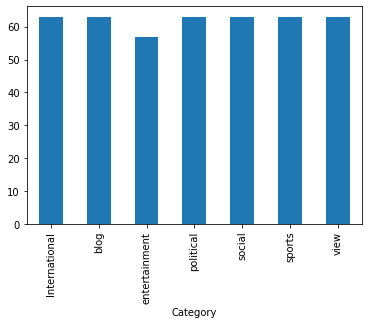

In [4]:
#Analyzing data
df.groupby('Category').News.count().plot.bar(ylim=0)
plt.show()

In [5]:
import numpy as np 
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english", norm='l2')

X = df['News']
Y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) #Splitting dataset

In [26]:
X_train[2]

'Cabinet revoked decision hand contract authenticating personal biological details citizens acquiring national identity card foreign company Rastriya Swatantra Party RSP President Rabi Lamichhane awarded contract Advantage International fast track home minister Cabinet meeting Monday revoked decision according minister decision revoked Home Ministry consult seek permission Law Ministry Finance Ministry awarding contract awarded per laws regulations according minister “Everything considered handing responsibility sensitive issue related national security foreign company found done decision revoked Law Ministry Finance Ministry consulted laws followed apart that” minister added issued would also investigated Lamichhane issued working procedure allowing invitation bids contract giving sevenday deadline two days sworn home minister Clause 14 Public Procurement Act requires 45day deadline inviting bids international tender law requires 15day extension first sevenday extension bids received 

In [9]:
#Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

In [10]:
#Training model
model = pipeline.fit(X_train, y_train)

In [11]:
#Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [37]:
#Accuracy
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict))
print('\n')
print(predict)

0.8807339449541285


['blog' 'sports' 'blog' 'political' 'International' 'entertainment'
 'political' 'view' 'entertainment' 'entertainment' 'entertainment'
 'sports' 'International' 'entertainment' 'entertainment' 'sports' 'view'
 'blog' 'entertainment' 'political' 'sports' 'blog' 'blog' 'social'
 'political' 'sports' 'sports' 'entertainment' 'blog' 'sports' 'political'
 'political' 'social' 'International' 'view' 'blog' 'sports' 'political'
 'political' 'political' 'blog' 'entertainment' 'political' 'sports'
 'entertainment' 'International' 'entertainment' 'entertainment' 'view'
 'social' 'view' 'entertainment' 'social' 'political' 'view'
 'entertainment' 'view' 'blog' 'view' 'blog' 'political' 'social' 'view'
 'International' 'social' 'political' 'entertainment' 'entertainment'
 'political' 'view' 'International' 'blog' 'view' 'sports' 'International'
 'sports' 'social' 'sports' 'political' 'entertainment' 'social' 'view'
 'view' 'social' 'view' 'social' 'sports' 'blog' 'view' 'poli

In [40]:
realtimes_news=pd.DataFrame({'real_news':['''Cabinet revoked decision hand contract authenticating personal biological details citizens acquiring national identity card foreign company Rastriya Swatantra Party RSP President Rabi Lamichhane awarded contract Advantage International fast track home minister Cabinet meeting Monday revoked decision according minister decision revoked Home Ministry consult seek permission Law Ministry Finance Ministry awarding contract awarded per laws regulations according minister “Everything considered handing responsibility sensitive issue related national security foreign company found done decision revoked Law Ministry Finance Ministry consulted laws followed apart that” minister added issued would also investigated Lamichhane issued working procedure allowing invitation bids contract giving sevenday deadline two days sworn home minister Clause 14 Public Procurement Act requires 45day deadline inviting bids international tender law requires 15day extension first sevenday extension bids received period company awarded contract January 26 Supreme Court SC next day ruled Lamichhane ineligible become lawmaker complete process reacquire citizenship certificate became invalid acquired US citizenship Lamichhane resigned deputy prime minister home minister day''']})

In [36]:
real_news=input('any news predict')
realtimes_news=pd.DataFrame({'real_news':[real_news]})
#Accuracy and predict
from sklearn.metrics import accuracy_score
predict = model.predict(realtimes_news['real_news'])
print(predict)

In [13]:
X_test

263    point doll respect lies stored specific areas ...
221    Nepali weightlifting team competing World Univ...
110    Patan historical city situated Lalitpur Distri...
160    Rastriya Swatantra Party RSP suspended lawmake...
425    asteroid big enough wipe city zip harmlessly E...
                             ...                        
408    government imposed lockdown March due COVID19 ...
64     paragliding athlete died participating paragli...
83     Industry Minister Gajendra Hamal resigned 40 h...
417    bidders India’s multibilliondollar incentive m...
401    Nepali theater industry’s struggle stability a...
Name: News, Length: 109, dtype: object

In [14]:
y_test

263             blog
221           sports
110             blog
160        political
425    International
           ...      
408             blog
64            sports
83              view
417    International
401             blog
Name: Category, Length: 109, dtype: object

In [41]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

               precision    recall  f1-score   support

International       1.00      0.92      0.96        12
         blog       0.86      0.71      0.77        17
entertainment       1.00      0.95      0.97        19
    political       0.94      1.00      0.97        16
       social       0.73      0.85      0.79        13
       sports       1.00      0.89      0.94        18
         view       0.67      0.86      0.75        14

     accuracy                           0.88       109
    macro avg       0.89      0.88      0.88       109
 weighted avg       0.89      0.88      0.88       109

[[11  0  0  0  1  0  0]
 [ 0 12  0  0  0  0  5]
 [ 0  0 18  0  1  0  0]
 [ 0  0  0 16  0  0  0]
 [ 0  0  0  1 11  0  1]
 [ 0  1  0  0  1 16  0]
 [ 0  1  0  0  1  0 12]]
